# Feature space and classification boundaries

While dtreeviz is dedicated primarily to showing decision trees, we have also provided a way to show the decision boundaries for one- and two- variable classifiers. The `clfviz()` function will work with any model that answers method `predict_proba()` and with Keras, for which we provided a special adapter (since that method is deprecated).

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
%config InlineBackend.figure_format = 'svg'  # Looks MUCH better than retina
# %config InlineBackend.figure_format = 'retina'

from rfpimp import *   # pip install rfpimp

from sklearn import tree

import dtreeviz
from dtreeviz import clfviz

## Two-variable classifications

### Wine data set

In [20]:
wine = load_wine()
X = wine.data
X = X[:,[12,6]]
y = wine.target

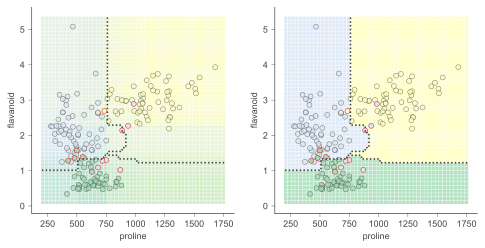

In [21]:
rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=20, n_jobs=-1)
rf.fit(X, y)

fig,axes = plt.subplots(1,2, figsize=(8,3.8), dpi=300)
clfviz(rf, X, y, ax=axes[0],
       feature_names=['proline', 'flavanoid'])
clfviz(rf, X, y, ax=axes[1],
       # show classification regions not probabilities
       show=['instances', 'boundaries', 'misclassified'], 
       feature_names=['proline', 'flavanoid'])
plt.show()

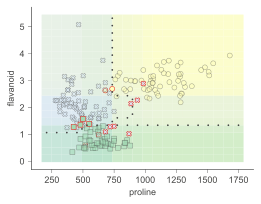

In [23]:
fig,ax = plt.subplots(1,1, figsize=(4,3))
clfviz(rf, X, y, ax=ax,
       ntiles=20,
       tile_fraction=1.0, # make continuous, no white borders between tiles
       markers=['o','X','s'], # use different markers
       feature_names=['proline', 'flavanoid'],
       colors={'scatter_marker_alpha':.5})

### Titantic

In [5]:
df = pd.read_csv("../data/titanic/titanic.csv")
df['Sex'] = np.where(df['Sex']=='male', 0, 1)

In [6]:
X, y = df.drop(['Survived','Name','Ticket','Cabin','Embarked'], axis=1), df['Survived']
X['Age_na'] = X['Age'].isna()
X['Age'] = X['Age'].fillna(X['Age'].median(skipna=True))
X = X[['Age','Fare']]

In [7]:
rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=3, n_jobs=-1)
rf.fit(X, y)

RandomForestClassifier(min_samples_leaf=3, n_estimators=20, n_jobs=-1)

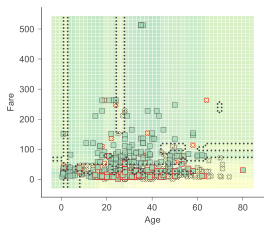

In [8]:
clfviz(rf, X, y, ntiles=50, 
       binary_threshold=.5,
       markers=['X','s'],
       feature_names=['Age','Fare'])

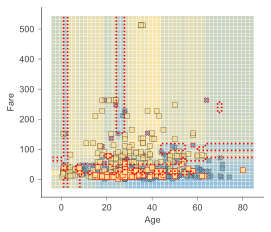

In [9]:
# Hideous colors for Oliver Zeigermann
clfviz(rf, X.values, y,
             markers=['X', 's'],
             feature_names=['Age', 'Fare'],
             colors={'class_boundary': 'red',
                     'classes':
                         [None,  # 0 classes
                          None,  # 1 class
                          ["#73ADD2", "#FEE08F"],  # 2 classes
                          ]})

### Cancer

In [10]:
cancer = load_breast_cancer()

df = pd.DataFrame(data=cancer.data)
df.columns = [f'f{i}' for i in range(df.shape[1])]
df['y'] = cancer.target

In [11]:
X, y = df.drop('y',axis=1), df['y']

In [12]:
X = df[['f27','f22']]

rf = RandomForestClassifier(n_estimators=30, min_samples_leaf=5, n_jobs=-1)
rf.fit(X, y)

RandomForestClassifier(min_samples_leaf=5, n_estimators=30, n_jobs=-1)

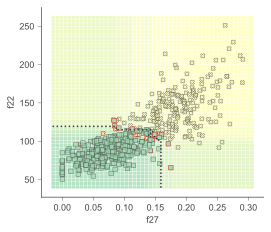

In [13]:
clfviz(rf, X.values, y,
             markers=['X','s'],
             feature_names=['f27', 'f22'],
             dot_w=20)

### Synthetic data set

In [14]:
def smiley(n = 1000):
    # mouth
    x1 = np.random.normal(1.0,.2,n).reshape(-1,1)
    x2 = np.random.normal(0.4,.05,n).reshape(-1,1)
    cl = np.full(shape=(n,1), fill_value=0, dtype=int)
    d = np.hstack([x1,x2,cl])
    data = d
    
    # left eye
    x1 = np.random.normal(.7,.2,n).reshape(-1,1)
#     x2 = np.random.normal(0.8,.1,n).reshape(-1,1)
    x2 = x1 + .3 + np.random.normal(0,.1,n).reshape(-1,1)
    cl = np.full(shape=(n,1), fill_value=1, dtype=int)
    d = np.hstack([x1,x2,cl])
    data = np.vstack([data, d])

    # right eye
    x1 = np.random.normal(1.3,.2,n).reshape(-1,1)
    x2 = np.random.normal(0.8,.1,n).reshape(-1,1)
    x2 = x1 - .5 + .3 + np.random.normal(0,.1,n).reshape(-1,1)
    cl = np.full(shape=(n,1), fill_value=2, dtype=int)
    d = np.hstack([x1,x2,cl])
    data = np.vstack([data, d])

    # face outline
    noise = np.random.normal(0,.1,n).reshape(-1,1)
    x1 = np.linspace(0,2,n).reshape(-1,1)
    x2 = (x1-1)**2 + noise
    cl = np.full(shape=(n,1), fill_value=3, dtype=int)
    d = np.hstack([x1,x2,cl])
    data = np.vstack([data, d])

    df = pd.DataFrame(data, columns=['x1','x2','class'])
    return df

Test we get 4 classes in a smiley face:

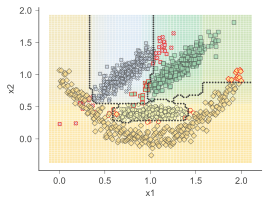

In [16]:
df = smiley(n=300)
X = df[['x1','x2']]
y = df['class']
rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=30, n_jobs=-1)
rf.fit(X, y)

fig,ax = plt.subplots(1,1,figsize=(4,3))
clfviz(rf, X, y, feature_names=['x1', 'x2'],
             markers=['o','X','s','D'],
             ntiles=70, dot_w=15, ax=ax)

# One-dimensional classifier plots

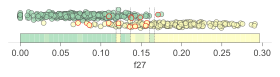

In [17]:
cancer = load_breast_cancer()

df = pd.DataFrame(data=cancer.data)
df.columns = [f'f{i}' for i in range(df.shape[1])]
df['y'] = cancer.target

x = df['f27']
y = df['y']

rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=1)
rf.fit(x.values.reshape(-1,1), y)

clfviz(rf,x,y,feature_names=['f27'])
plt.tight_layout()

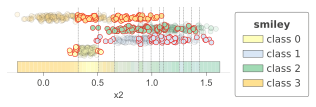

In [18]:
df = smiley(n=200)
x = df[['x2']].values
y = df['class'].astype('int').values
rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=10, n_jobs=-1)
rf.fit(x, y)
clfviz(rf,x,y,
       show=['instances', 'boundaries', 'probabilities', 'misclassified','legend'],
       feature_names=['x2'],
       target_name = 'smiley',
       colors={'scatter_marker_alpha':.2})